# Test different betting stratigies
Try out two different approaches to adjusting to observed history when betting on the outcome of a weighted coin. 

In [1]:
from functools import partial
from scipy.stats import binom 
from gambler import gambler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt     
import seaborn as sns
sns.set_style('darkgrid')
c = sns.color_palette('deep')
#_ = plt.xkcd()

% matplotlib inline

In [2]:
# Define coins/games
# ------------------

weighted_coin = partial(
    binom.rvs,
    n = 1,
    p = 0.75
)

fair_coin = partial(
    binom.rvs,
    n = 1,
    p = 0.5
)

In [3]:
# How many experiments?
# ---------------------
n_rounds = 100
n_players = 50

In [4]:
# Base line
# ---------
# Players bet against a fair coin with 
# no responsive strategy 

X0 = pd.DataFrame(index=range(n_rounds),columns=range(n_players))
for g in range(n_players) : 
    x = gambler(fair_coin)
    _ = x.play_the_game(n_rounds)
    X0.loc[:,g] = x.balance


In [5]:
# Unfair game
# -----------
# Players bet against a weighted coin 
# with no responsive strategy 

X1 = pd.DataFrame(index=range(n_rounds),columns=range(n_players))
for g in range(n_players) : 
    x = gambler(weighted_coin)
    _ = x.play_the_game(n_rounds)
    X1.loc[:,g] = x.balance


In [6]:
# Unfair game - with bayesian learning
# ------------------------------------
# Update the requested odds based on history

X2 = pd.DataFrame(index=range(n_rounds),columns=range(n_players))
for g in range(n_players) : 
    x = gambler(weighted_coin)
    _ = x.play_the_game(n_rounds,strategy='learn')
    X2.loc[:,g] = x.balance


In [7]:
# Unfair game - with cautious betting
# -----------------------------------
# Update the requested odds based on history
# but limit bet proportional to uncertainty 
# in estimate

X3 = pd.DataFrame(index=range(n_rounds),columns=range(n_players))
for g in range(n_players) : 
    x = gambler(weighted_coin)
    _ = x.play_the_game(n_rounds,strategy='cautious')
    X3.loc[:,g] = x.balance


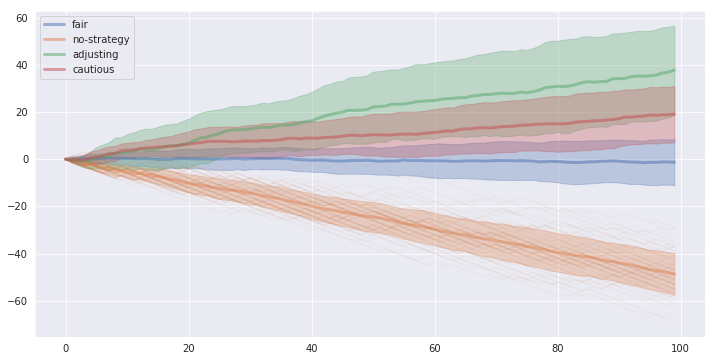

In [12]:
# Show outcomes
# -------------
ix = range(100)

_ = plt.figure(figsize=(12,6))

#_ = plt.plot(X0.loc[ix,:],'-',alpha=0.05,c=c[0])
_ = plt.plot(X0.loc[ix,:].mean(axis=1),c=c[0],lw=3,alpha=0.5,
             label='fair')
_ = plt.fill_between(
    x=X0.loc[ix,:].index,
    y1=X0.loc[ix,:].mean(axis=1)-X0.loc[ix,:].std(axis=1),
    y2=X0.loc[ix,:].mean(axis=1)+X0.loc[ix,:].std(axis=1),
    alpha=0.3,color=c[0])

_ = plt.plot(X1,'-',alpha=0.05,c=c[1])
_ = plt.plot(X1.loc[ix,:].mean(axis=1),c=c[1],lw=3,alpha=0.5,
             label='no-strategy')
_ = plt.fill_between(
    x=X1.loc[ix,:].index,
    y1=X1.loc[ix,:].mean(axis=1)-X1.loc[ix,:].std(axis=1),
    y2=X1.loc[ix,:].mean(axis=1)+X1.loc[ix,:].std(axis=1),
    alpha=0.3,color=c[1])

#_ = plt.plot(X2.loc[ix,:],'-',alpha=0.05,c=c[2])
_ = plt.plot(X2.loc[ix,:].mean(axis=1),c=c[2],lw=3,alpha=0.5,
             label='adjusting')
_ = plt.fill_between(
    x=X2.loc[ix,:].index,
    y1=X2.loc[ix,:].mean(axis=1)-X2.loc[ix,:].std(axis=1),
    y2=X2.loc[ix,:].mean(axis=1)+X2.loc[ix,:].std(axis=1),
    alpha=0.3,color=c[2])

#_ = plt.plot(X3.loc[ix,:],'-',alpha=0.05,c=c[3])
_ = plt.plot(X3.loc[ix,:].mean(axis=1),c=c[3],lw=3,alpha=0.5,
             label='cautious')
_ = plt.fill_between(
    x=X3.loc[ix,:].index,
    y1=X3.loc[ix,:].mean(axis=1)-X3.loc[ix,:].std(axis=1),
    y2=X3.loc[ix,:].mean(axis=1)+X3.loc[ix,:].std(axis=1),
    alpha=0.3,color=c[3])

_ = plt.legend()

In [9]:
outcomes = {'fair' : X0,
            'no-strategy' : X1,
            'adjusting' : X2,
            'cautious' : X3}

In [10]:
ix = 8
strategies = outcomes.keys() 
for strategy in strategies : 
    x = outcomes[strategy].loc[ix,:]
    print(
        strategy.capitalize() + ' '
        + str(round(x.mean(),2)) + ' +/- ' 
        + str(round(x.std()/np.sqrt(len(x)),2)))
    

Fair 0.4 +/- 0.37
No-strategy -4.64 +/- 0.33
Adjusting 2.63 +/- 0.92
Cautious 2.31 +/- 0.46
